In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import requests
import json
from PIL import Image
from urllib.request import urlopen
from mplsoccer import Pitch, add_image

In [10]:
r = requests.get('https://webws.365scores.com/web/game/?appTypeId=5&langId=29&timezoneName=America/Asuncion&userCountryId=108&gameId=4039624&matchupId=1280-8778-621')

In [11]:
partido = r.json()

In [12]:
partido.keys()

dict_keys(['lastUpdateId', 'requestedUpdateId', 'ttl', 'game', 'sports', 'countries', 'competitions'])

In [13]:
imagen1 = Image.open(urlopen('https://api.sofascore.app/api/v1/team/5991/image'))
imagen2 = Image.open(urlopen('https://api.sofascore.app/api/v1/team/5996/image'))


In [14]:
pd.DataFrame(partido['game']['homeCompetitor']['statistics'])

,id,name,categoryId,categoryName,isMajor,value,valuePercentage,isPrimary
0,10,Posesión,1,Posesión,True,48%,0.48,True
1,3,Total Remates,2,Ataque,False,13,0.62,False
2,4,Remates a Puerta,2,Ataque,True,5,0.56,False
3,5,Remates Fuera,2,Ataque,False,8,0.67,False
4,16,Ataques con posibilidad de gol,2,Ataque,False,63,0.50,False
5,8,Saques de Esquina,2,Ataque,True,6,0.60,False
6,9,Fueras de Juego,2,Ataque,True,1,0.25,False
7,13,Saques de falta,2,Ataque,False,12,0.50,False
8,21,Total de pases,2,Ataque,False,0,0.00,False
9,19,Pases completados,2,Ataque,False,0,0.00,False


In [15]:
pd.DataFrame(partido['game']['awayCompetitor']['statistics'])

,id,name,categoryId,categoryName,isMajor,value,valuePercentage,isPrimary
0,10,Posesión,1,Posesión,True,52%,0.52,True
1,3,Total Remates,2,Ataque,False,8,0.38,False
2,4,Remates a Puerta,2,Ataque,True,4,0.44,False
3,5,Remates Fuera,2,Ataque,False,4,0.33,False
4,16,Ataques con posibilidad de gol,2,Ataque,False,64,0.50,False
5,8,Saques de Esquina,2,Ataque,True,4,0.40,False
6,9,Fueras de Juego,2,Ataque,True,3,0.75,False
7,13,Saques de falta,2,Ataque,False,12,0.50,False
8,21,Total de pases,2,Ataque,False,0,0.00,False
9,19,Pases completados,2,Ataque,False,0,0.00,False


"ax13 = fig.add_subplot(gs[3:,2:4])\nax13.set_title('[3:,2:4]')"

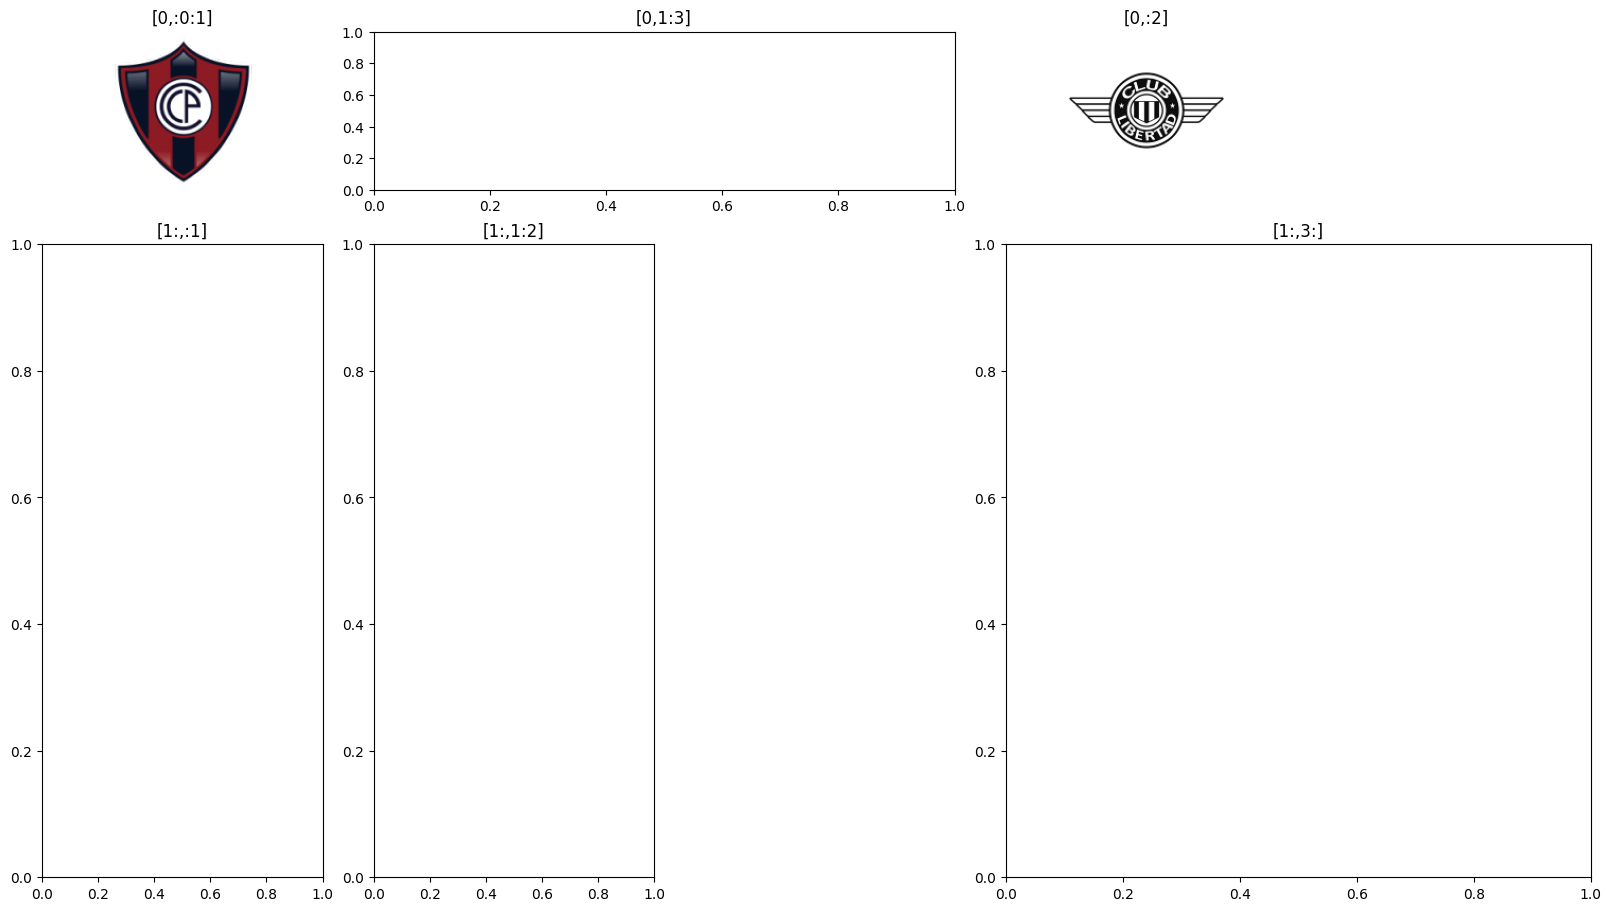

In [31]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=5)
fig.set_facecolor('white')

ax1 = fig.add_subplot(gs[0,0:1])
ax1.set_title('[0,:0:1]')
ax1.imshow(imagen1)
ax1.spines[['top','right','bottom','left']].set_visible(False)
ax1.xaxis.set_visible(False), ax1.yaxis.set_visible(False)

ax2 = fig.add_subplot(gs[0,3:4])
ax2.set_title('[0,:2]')
ax2.imshow(imagen2)
ax2.spines[['top','right','bottom','left']].set_visible(False)
ax2.xaxis.set_visible(False), ax2.yaxis.set_visible(False)

ax3 = fig.add_subplot(gs[0,1:3])
ax3.set_title('[0,1:3]')

"""ax3 = fig.add_subplot(gs[0,3:4])
ax3.set_title('[0,3:4]')

ax4 = fig.add_subplot(gs[0,4:5])
ax4.set_title('[0,4:5]')"""

"""ax5 = fig.add_subplot(gs[0,5:])
ax5.set_title('[0,5:]')"""

ax6 = fig.add_subplot(gs[1:,:1])
ax6.set_title('[1:,:1]')

ax7 = fig.add_subplot(gs[1:,1:2])
ax7.set_title('[1:,1:2]')

ax8 = fig.add_subplot(gs[1:,3:])
ax8.set_title('[1:,3:]')

"""ax8 = fig.add_subplot(gs[1:3,5:])
ax8.set_title('[1:3,5:]')"""

"""ax9 = fig.add_subplot(gs[4:,0:2])
ax9.set_title('[4:,0:2]')"""

"""ax10 = fig.add_subplot(gs[4:,5:])
ax10.set_title('[4:,5:]')"""

"""ax11 = fig.add_subplot(gs[3:4,0:2])
ax11.set_title('[3:4,0:2]')"""

"""ax12 = fig.add_subplot(gs[3:4,5:])
ax12.set_title('[3:4,5:]')"""

"""ax13 = fig.add_subplot(gs[3:,2:4])
ax13.set_title('[3:,2:4]')"""